In [7]:
!pip install pandas
!pip install pandas_datareader
!pip install matplotlib
!pip install statsmodels
!pip install numpy
!pip install datetime
!pip install pandas_ta
!pip install yfinance
# !pip install warnings

In [6]:
### All package need

In [48]:
# from statsmodels.regression.rolling import RollingOLS
# import pandas_datareader.data as web
# import matplotlib.pyplot as plt
# import statsmodels.api as sm
# import pandas as pd
# import numpy as np
# import datetime as dt
# import yfinance as yf
# import pandas_ta
# import warnings
# warnings.filterwarnings('ignore')

# # html에서 해당 값을 불러오는 pd.read_html
# sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

# sp500['Symbol'] =sp500['Symbol'].str.replace('.','-')

# symbols_list = sp500['Symbol'].unique().tolist()

# end_date = '2023-10-27'

# #현재 시간보다 8년 전 데이터까지의 범위 설정
# start_date = pd.to_datetime(end_date) - pd.DateOffset(365*8)
# start_date
df = yf.download(tickers = symbols_list,
                start = start_date,
                end=end_date)
df

[*********************100%%**********************]  503 of 503 completed


Adj Close                                                 \
                     A        AAL        AAPL        ABBV        ABNB   
Date                                                                    
2015-10-29   35.295467  43.731598   27.351479   38.293591         NaN   
2015-10-30   35.351635  44.074890   27.117741   42.151264         NaN   
2015-11-02   36.128700  44.313282   27.498981   44.862251         NaN   
2015-11-03   35.829102  44.437519   27.814411   44.189812         NaN   
2015-11-04   35.894646  43.606106   27.685066   45.159534         NaN   
...                ...        ...         ...         ...         ...   
2023-10-20  109.230003  11.080000  172.880005  146.229996  116.489998   
2023-10-23  109.339996  11.290000  173.000000  144.729996  120.389999   
2023-10-24  105.639999  11.210000  173.440002  146.309998  122.010002   
2023-10-25  103.400002  11.040000  171.100006  145.259995  118.500000   
2023-10-26  104.309998  11.150000  166.889999  145.199997  115.470001   

                                                                      ...  \
                  ABT       ACGL         ACN        ADBE         ADI  ...   
Date                                                                  ...   
2015-10-29  38.944870  25.883333   94.988274   88.120003   50.788502  ...   
2015-10-30  38.566090  24.963333   94.328331   88.660004   50.907051  ...   
2015-11-02  39.108425  25.000000   94.680305   89.910004   51.093338  ...   
2015-11-03  39.177288  24.870001   94.425110   90.360001   51.364296  ...   
2015-11-04  38.893219  24.803333   93.729980   91.010002   51.220352  ...   
...               ...        ...         ...         ...         ...  ...   
2023-10-20  96.779999  82.760002  297.000000  540.960022  166.520004  ...   
2023-10-23  95.779999  81.860001  294.940002  540.409973  163.869995  ...   
2023-10-24  94.809998  83.419998  296.089996  539.559998  164.929993  ...   
2023-10-25  93.570000  83.489998  292.679993  521.140015  159.789993  ...   
2023-10-26  93.980003  82.449997  292.040009  514.280029  160.860001  ...   

             Volume                                                         \
               WYNN      XEL       XOM     XRAY      XYL      YUM      ZBH   
Date                                                                         
2015-10-29  4584300  4433300  10341200  1669200  1769300  3230180  2675219   
2015-10-30  2949300  3160300  18758600  1991300  1865100  6806024  1953704   
2015-11-02  4274200  2499200  21266500  1252400   974100  4055878  1471973   
2015-11-03  4616600  1817800  20115900  1140500  1658900  3707015  1136502   
2015-11-04  4286300  1925300  14245400  1009500  1008600  3273579  1168123   
...             ...      ...       ...      ...      ...      ...      ...   
2023-10-20  1106400  4224800  22439800  5819500  2774600  1568400  1294000   
2023-10-23  2371400  4854200  18185000  2365900  1896200  1495700  1698200   
2023-10-24  1335000  3854000  16786100  4240800  1181100  1246800  1542000   
2023-10-25  1518500  3133100  22047300  5733000  1411800   985800  1698500   
2023-10-26  2183400  3468000  18768300  5965700  1155500  1374500  1197700   

                                      
              ZBRA     ZION      ZTS  
Date                                  
2015-10-29  364100  2375500  3019000  
2015-10-30  313900  2775000  3774400  
2015-11-02  497200  1947700  4298800  
2015-11-03  253300  2413900  8007200  
2015-11-04  521800  1863400  7718100  
...            ...      ...      ...  
2023-10-20  860400  6613800  1932000  
2023-10-23  482800  4626200  1075400  
2023-10-24  348200  2592600  1201400  
2023-10-25  577900  2713300  1273600  
2023-10-26  735500  4151700  2891100  

[2012 rows x 3018 columns]

In [55]:
# save_df = df
# df.stack()
# df =df.stack()
# df.index.names = ['date', 'ticker']
# df.columns = df.columns.str.lower()

# setting the data formet
df

adj close       close        high         low        open  \
date       ticker                                                               
2015-10-29 A        35.295467   37.700001   37.770000   37.279999   37.470001   
           AAL      43.731598   45.860001   46.099998   45.209999   45.630001   
           AAPL     27.351479   30.132500   30.172501   29.567499   29.674999   
           ABBV     38.293591   54.099998   55.180000   53.020000   53.200001   
           ABT      38.944870   45.240002   45.340000   44.799999   44.930000   
...                       ...         ...         ...         ...         ...   
2023-10-26 YUM     118.750000  118.750000  120.970001  118.730003  120.709999   
           ZBH     103.120003  103.120003  104.379997  102.980003  103.519997   
           ZBRA    204.830002  204.830002  207.380005  198.860001  200.000000   
           ZION     30.450001   30.450001   30.860001   29.559999   29.559999   
           ZTS     158.070007  158.070007  162.289993  157.880005  162.270004   

                        volume  
date       ticker               
2015-10-29 A         1352300.0  
           AAL       5234400.0  
           AAPL    204909200.0  
           ABBV      9304400.0  
           ABT       6887700.0  
...                        ...  
2023-10-26 YUM       1374500.0  
           ZBH       1197700.0  
           ZBRA       735500.0  
           ZION      4151700.0  
           ZTS       2891100.0  

[994515 rows x 6 columns]

# 2. Calculate features and technical indicators for each stock.

- Garman-Klass Colatility
- RSI
- Bollinger Bands
- ATR
- MACD
- Dollar Volume


In [95]:
df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj close']) -np.log(df['open']))**2)

df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))
  
df

adj close       close        high         low        open  \
date       ticker                                                               
2015-10-29 A        35.295467   37.700001   37.770000   37.279999   37.470001   
           AAL      43.731598   45.860001   46.099998   45.209999   45.630001   
           AAPL     27.351479   30.132500   30.172501   29.567499   29.674999   
           ABBV     38.293591   54.099998   55.180000   53.020000   53.200001   
           ABT      38.944870   45.240002   45.340000   44.799999   44.930000   
...                       ...         ...         ...         ...         ...   
2023-10-26 YUM     118.750000  118.750000  120.970001  118.730003  120.709999   
           ZBH     103.120003  103.120003  104.379997  102.980003  103.519997   
           ZBRA    204.830002  204.830002  207.380005  198.860001  200.000000   
           ZION     30.450001   30.450001   30.860001   29.559999   29.559999   
           ZTS     158.070007  158.070007  162.289993  157.880005  162.270004   

                        volume  garman_klass_vol        rsi    bb_low  
date       ticker                                                      
2015-10-29 A         1352300.0         -0.001296        NaN       NaN  
           AAL       5234400.0         -0.000508        NaN       NaN  
           AAPL    204909200.0         -0.002363        NaN       NaN  
           ABBV      9304400.0         -0.040959        NaN       NaN  
           ABT       6887700.0         -0.007823        NaN       NaN  
...                        ...               ...        ...       ...  
2023-10-26 YUM       1374500.0          0.000071  40.086364  4.771513  
           ZBH       1197700.0          0.000085  32.489893  4.643055  
           ZBRA       735500.0          0.000660  34.025230  5.295774  
           ZION      4151700.0          0.000586  39.989584  3.345782  
           ZTS       2891100.0          0.000114  27.519485  5.071887  

[994515 rows x 9 columns]

<Axes: xlabel='date'>

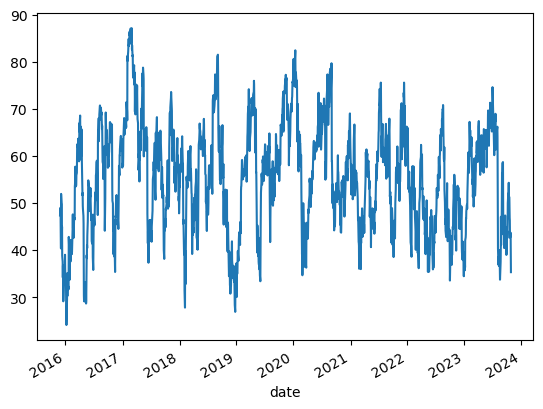

In [62]:
df.xs('AAPL', level=1)['rsi'].plot()

In [96]:
df['bb_low'] = df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=10).iloc[:, 0])

df['bb_mid'] = df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=10).iloc[:, 1])

df['bb_high'] = df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=10).iloc[:, 2])
df

adj close       close        high         low        open  \
date       ticker                                                               
2015-10-29 A        35.295467   37.700001   37.770000   37.279999   37.470001   
           AAL      43.731598   45.860001   46.099998   45.209999   45.630001   
           AAPL     27.351479   30.132500   30.172501   29.567499   29.674999   
           ABBV     38.293591   54.099998   55.180000   53.020000   53.200001   
           ABT      38.944870   45.240002   45.340000   44.799999   44.930000   
...                       ...         ...         ...         ...         ...   
2023-10-26 YUM     118.750000  118.750000  120.970001  118.730003  120.709999   
           ZBH     103.120003  103.120003  104.379997  102.980003  103.519997   
           ZBRA    204.830002  204.830002  207.380005  198.860001  200.000000   
           ZION     30.450001   30.450001   30.860001   29.559999   29.559999   
           ZTS     158.070007  158.070007  162.289993  157.880005  162.270004   

                        volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2015-10-29 A         1352300.0         -0.001296        NaN       NaN   
           AAL       5234400.0         -0.000508        NaN       NaN   
           AAPL    204909200.0         -0.002363        NaN       NaN   
           ABBV      9304400.0         -0.040959        NaN       NaN   
           ABT       6887700.0         -0.007823        NaN       NaN   
...                        ...               ...        ...       ...   
2023-10-26 YUM       1374500.0          0.000071  40.086364  4.771513   
           ZBH       1197700.0          0.000085  32.489893  4.643055   
           ZBRA       735500.0          0.000660  34.025230  5.295774   
           ZION      4151700.0          0.000586  39.989584  3.345782   
           ZTS       2891100.0          0.000114  27.519485  5.071887   

                     bb_mid   bb_high  
date       ticker                      
2015-10-29 A            NaN       NaN  
           AAL          NaN       NaN  
           AAPL         NaN       NaN  
           ABBV         NaN       NaN  
           ABT          NaN       NaN  
...                     ...       ...  
2023-10-26 YUM     4.790773  4.810033  
           ZBH     4.661753  4.680451  
           ZBRA    5.337075  5.378375  
           ZION    3.508537  3.671292  
           ZTS     5.131729  5.191570  

[994515 rows x 11 columns]

In [98]:
# pandas_ta.atr(high=df['high'],
#              low = df['low'],
#              close = df['close'],
#              length=14)

date        ticker
2015-10-29  A               NaN
            AAL             NaN
            AAPL            NaN
            ABBV            NaN
            ABT             NaN
                        ...    
2023-10-26  YUM       93.375602
            ZBH       87.832344
            ZBRA      89.005748
            ZION      95.167481
            ZTS       97.786946
Name: ATRr_14, Length: 994515, dtype: float64

In [102]:
def compute_atr(stock_data):
    atr = pandas_ta.atr(high=df['high'],
                 low = df['low'],
                 close = df['close'],
                 length=10)
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)
df


ValueError: Cannot set a DataFrame with multiple columns to the single column atr